# VISUALIZATION OF EVENTS IN HGCAL 

In [1]:
import ROOT
import pandas as pd
import numpy as np 

import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
mpl.rcParams['image.cmap'] = 'hot_r'

Welcome to JupyROOT 6.14/04


In [ ]:
'''
#TBranches containing the 3D TCs' info
branches_tc = ['event', 'tc_id', 'tc_subdet', 'tc_zside', 'tc_layer', 'tc_waferu', 'tc_waferv', 'tc_wafertype', 'tc_panel_number', 'tc_panel_sector', 'tc_cellu', 'tc_cellv', 'tc_data', 'tc_uncompressedCharge', 'tc_compressedCharge',  'tc_pt', 'tc_energy', 'tc_eta', 'tc_phi', 'tc_x', 'tc_y', 'tc_z', 'tc_mipPt', 'tc_cluster_id', 'tc_multicluster_id', 'tc_multicluster_pt']
branches_tc_flatten = ['tc_id', 'tc_subdet', 'tc_zside', 'tc_layer', 'tc_waferu', 'tc_waferv', 'tc_wafertype', 'tc_panel_number', 'tc_panel_sector', 'tc_cellu', 'tc_cellv', 'tc_data', 'tc_uncompressedCharge', 'tc_compressedCharge',  'tc_pt', 'tc_energy', 'tc_eta', 'tc_phi', 'tc_x', 'tc_y', 'tc_z', 'tc_mipPt', 'tc_cluster_id', 'tc_multicluster_id', 'tc_multicluster_pt']

#TBranches containing the 3D clusters' info
branches_cl3d = ['event', 'cl3_id', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta', 'cl3d_phi', 'cl3d_clusters_n', 'cl3d_showerlength', 'cl3d_coreshowerlength',  'cl3d_firstlayer','cl3d_maxlayer','cl3d_seetot', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',  'cled_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50', 'cl3d_layer90',  'cl3d_ntc67', 'cl3d_ntc90', 'cl3d_bdteg', 'cl3d_uality']
branches_cl3d_flatten = ['cl3_id', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta', 'cl3d_phi', 'cl3d_clusters_n', 'cl3d_showerlength', 'cl3d_coreshowerlength',  'cl3d_firstlayer','cl3d_maxlayer','cl3d_seetot', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',  'cled_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50', 'cl3d_layer90',  'cl3d_ntc67', 'cl3d_ntc90', 'cl3d_bdteg', 'cl3d_uality']

# TBranches containing the gen taus' info
branches_gentau = ['event', 'gentau_pt', 'gentau_eta', 'gentau_phi', 'gentau_energy', 'gentau_mass', 'gentau_vis_pt', 'gentau_vis_eta', 'gentau_vis_phi', 'gentau_vis_energy', 'gentau_vis_mass', 'gentau_decayMode']
branches_gentau_flatten = ['gentau_pt', 'gentau_eta', 'gentau_phi', 'gentau_energy', 'gentau_mass', 'gentau_vis_pt', 'gentau_vis_eta', 'gentau_vis_phi', 'gentau_vis_energy', 'gentau_vis_mass', 'gentau_decayMode']

# TBranches containing the gen jets' info
branches_genjet = ['event', 'genjet_pt', 'genjet_eta', 'genjet_phi', 'genjet_energy', 'genjet_mass']
branches_genjet_flatten = ['genjet_pt', 'genjet_eta', 'genjet_phi', 'genjet_energy', 'genjet_mass']
'''

In [2]:
indir = '/data_cms_upgrade/motta/HGCAL_SKIMS/SKIM_22Apr2021'
rfile = ROOT.TFile.Open(indir+'/SKIM_RelValTenTau_noPU_caloTruth/mergedOutput.root')
tree = rfile.Get('HGCALskimmedTree')

TAU = True
QCD = False

print(tree.GetEntries())

8471


In [ ]:
print('LIST OF ENTRIES WITH ONE TAU PER ENDCAP')
for evt in range(tree.GetEntries()):
    tree.GetEntry(evt)
    taus = []
    for t in range(len(tree.gentau_decayMode)):
        if abs(tree.gentau_eta[t]) >= 1.5 or abs(tree.gentau_eta[t]) <= 3.0:
            taus.append(t)    
    l = len(taus)
    if l <= 2 and l > 0: 
        if l == 2:
            gen_eta = tree.gentau_vis_eta
            if gen_eta[0]*gen_eta[1] < 0:
                print(evt, end = ', ')
        else:
            print(evt, end = ', ')

In [ ]:
print(r'LIST OF ENTRIES WITH ONE TAU PER ENDCAP AND PI0 IN THE DECAY')
for evt in range(tree.GetEntries()):
    tree.GetEntry(evt)
    l = len(tree.gentau_decayMode)
    if l <= 2and l > 0: 
        if l == 2:
            gen_eta = tree.gentau_vis_eta
            gen_dm = tree.gentau_decayMode
            if (gen_eta[0]*gen_eta[1]) < 0 and (gen_dm[0] == 1 or gen_dm[0] == 11) or (gen_dm[1] == 1 or gen_dm[1] == 11 < 0):
                print(evt, end = ', ')
        else:
            gen_dm = tree.gentau_decayMode
            if gen_dm[0] == 1 or gen_dm[0] == 11:
                print(evt, end = ', ')

In [3]:
entry = 17 # this is the entry number [0,nEntries] NOT the event number
tree.GetEntry(entry)

272472

In [4]:
tree.Show(entry)

======> EVENT:17
 run             = 1
 event           = 7317
 lumi            = 74
 genjet_n        = -1
 genjet_pt       = (vector<float>*)0xa4d1da0
 genjet_eta      = (vector<float>*)0xa52d170
 genjet_phi      = (vector<float>*)0xa534600
 genjet_energy   = (vector<float>*)0xa4e8480
 genjet_mass     = (vector<float>*)0xa51f730
 gentau_n        = 2
 gentau_pt       = (vector<float>*)0xa522e10
 gentau_eta      = (vector<float>*)0xa51d320
 gentau_phi      = (vector<float>*)0xa4d1e00
 gentau_energy   = (vector<float>*)0xa52b700
 gentau_mass     = (vector<float>*)0xa52b3d0
 gentau_vis_pt   = (vector<float>*)0xa522be0
 gentau_vis_eta  = (vector<float>*)0xa52b2a0
 gentau_vis_phi  = (vector<float>*)0xa52a1d0
 gentau_vis_energy = (vector<float>*)0xa4d5b10
 gentau_vis_mass = (vector<float>*)0xa4d6c60
 gentau_decayMode = (vector<int>*)0xa533580
 gentau_products_pt = (vector<vector<float> >*)0xab026f0
 gentau_products_eta = (vector<vector<float> >*)0xaabd3c0
 gentau_products_phi = (vector<vector

In [5]:
if TAU:
    gen_dm = tree.gentau_decayMode 
    print('FOUND',len(gen_dm),'TAUS IN THIS EVENT')
    gen_pt = tree.gentau_vis_pt
    gen_eta = tree.gentau_vis_eta
    gen_phi = tree.gentau_vis_phi
    gen_mass = tree.gentau_vis_mass
    gen_energy = tree.gentau_vis_energy
elif QCD:
    gen_dm = -2*np.sgn(tree.genjet_pt)
    gen_pt = tree.genjet_pt
    gen_eta = tree.genjet_eta
    gen_phi = tree.genjet_phi
    gen_mass = tree.genjet_mass

gen_dict = {}

for i in range(len(gen_pt)):
    gen_dict[i] = {'DM': {}, 'v4': {}}
    gen_dict[i]['DM'] = gen_dm[i]
    gen_dict[i]['v4'] = ROOT.TLorentzVector()
    gen_dict[i]['v4'].SetPtEtaPhiM(gen_pt[i],gen_eta[i],gen_phi[i],gen_mass[i])

FOUND 2 TAUS IN THIS EVENT


In [6]:
cl3d_n      = tree.cl3d_n
cl3d_id     = tree.cl3d_id
cl3d_pt     = tree.cl3d_pt
cl3d_energy = tree.cl3d_energy
cl3d_eta    = tree.cl3d_eta
cl3d_phi    = tree.cl3d_phi

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


DM 11


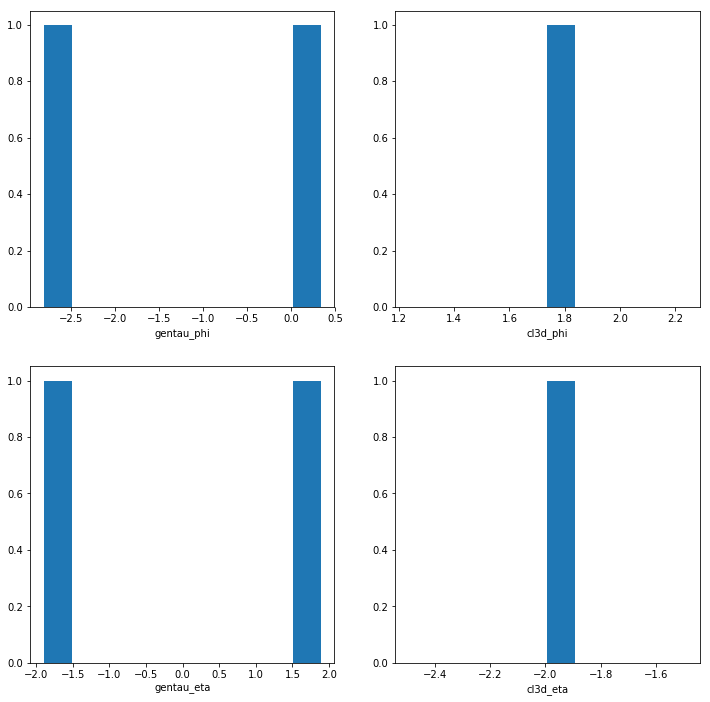

In [7]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(gen_phi)
ax2.hist(cl3d_phi[0])
ax3.hist(gen_eta)
ax4.hist(cl3d_eta[0])

ax1.set_xlabel('gentau_phi')
ax2.set_xlabel('cl3d_phi')
ax3.set_xlabel('gentau_eta')
ax4.set_xlabel('cl3d_eta')

fig.show()

print("DM", gen_dm[0])

In [ ]:
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(gen_pt)
ax2.hist(cl3d_pt)

ax1.set_xlabel('gen_pt')
ax2.set_xlabel('cl3d_pt')

fig.show()

print("DM", gen_dm[0])

In [ ]:
genpart_gen = tree.genpart_gen
cl3d_genparticle_index = tree.cl3d_genparticle_index

In [ ]:
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(gen_pt)
ax2.hist(cl3d_genparticle_index)

ax1.set_xlabel('genpart_gen')
ax2.set_xlabel('cl3d_genparticle_index')

fig.show()

print("DM", gen_dm[0])

In [ ]:
tc_cluster_id   = tree.tc_cluster_id
tc_multicluster_id = tree.tc_multicluster_id
tc_multicluster_pt = tree.tc_multicluster_pt
tc_genparticle_index = tree.tc_genparticle_index

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(tc_cluster_id)
ax2.hist(tc_multicluster_id)
ax3.hist(tc_multicluster_pt)
ax4.hist(tc_genparticle_index)

ax1.set_xlabel('tc_cluster_id')
ax2.set_xlabel('tc_multicluster_id')
ax3.set_xlabel('tc_multicluster_pt')
ax4.set_xlabel('tc_genparticle_index')

fig.show()

print("DM", gen_dm[0])

In [ ]:
tctruth_cluster_id   = tree.tctruth_cluster_id
tctruth_multicluster_id = tree.tctruth_multicluster_id
tctruth_multicluster_pt = tree.tctruth_multicluster_pt

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(tc_cluster_id)
ax2.hist(tc_multicluster_id)
ax3.hist(tc_multicluster_pt)

ax1.set_xlabel('tctruth_cluster_id')
ax2.set_xlabel('tctruth_multicluster_id')
ax3.set_xlabel('tctruth_multicluster_pt')

fig.show()

print("DM", gen_dm[0])

In [ ]:
cl3d_n = tree.cl3d_n
cl3d_id = tree.cl3d_id
cl3d_clusters_n = tree.cl3d_clusters_n
cl3d_clusters_id = tree.cl3d_clusters_id

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(cl3d_n)
ax2.hist(cl3d_id)
ax3.hist(cl3d_clusters_n)
ax4.hist(cl3d_clusters_id)

ax1.set_xlabel('cl3d_n')
ax2.set_xlabel('cl3d_id')
ax3.set_xlabel('cl3d_clusters_n')
ax4.set_xlabel('cl3d_clusters_id')

fig.show()

print("DM", gen_dm[0])

In [ ]:
cl3dtruth_n = tree.cl3dtruth_n
cl3dtruth_id = tree.cl3dtruth_id
cl3dtruth_clusters_n = tree.cl3dtruth_clusters_n
cl3dtruth_clusters_id = tree.cl3dtruth_clusters_id

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(cl3dtruth_n)
ax2.hist(cl3dtruth_id)
ax3.hist(cl3dtruth_clusters_n)
ax4.hist(cl3dtruth_clusters_id)

ax1.set_xlabel('cl3dtruth_n')
ax2.set_xlabel('cl3dtruth_id')
ax3.set_xlabel('cl3dtruth_clusters_n')
ax4.set_xlabel('cl3dtruth_clusters_id')

fig.show()

print("DM", gen_dm[0])

In [ ]:
cl3dfulltruth_n = tree.cl3dfulltruth_n
cl3dfulltruth_id = tree.cl3dfulltruth_id
cl3dfulltruth_clusters_n = tree.cl3dfulltruth_clusters_n
cl3dfulltruth_clusters_id = tree.cl3dfulltruth_clusters_id

len(cl3dfulltruth_id)

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(cl3dfulltruth_n)
ax2.hist(cl3dfulltruth_id)
ax3.hist(cl3dfulltruth_clusters_n)
ax4.hist(cl3dfulltruth_clusters_id)

ax1.set_xlabel('cl3dfulltruth_n')
ax2.set_xlabel('cl3dfulltruth_id')
ax3.set_xlabel('cl3dfulltruth_clusters_n')
ax4.set_xlabel('cl3dfulltruth_clusters_id')

fig.show()

print("DM", gen_dm[0])

# ------------------------------------------------------
# ------------------------------------------------------

## TEST STUFF THAT IS NOT WORKING

In [ ]:
ROOT.ROOT.EnableImplicitMT(1)
df = ROOT.RDataFrame("SkimmedTree", indir+'/SKIM_RelValTenTau_PU200/mergedOutput.root')

In [ ]:
df_z = df.Filter("tc_zside > 0")
report = df_z.Report()
report.Print()

In [ ]:
print(len(clusterID))

In [ ]:
ROOT.gInterpreter.Declare('''
vector< vector<float> > zSideSelection(string file_name, string tree_name, int entry) {
    cout << "here 1" << endl;
    TFile rfile(file_name.c_str());
    TTree * tree = (TTree *)rfile.Get(tree_name.c_str());
    cout << "here 2" << endl;
    vector< vector<float> > out;
    vector<float> out_tc_x;
    vector<float> out_tc_y;
    vector<float> out_tc_z;
    vector<float> out_tc_layer;
    vector<float> out_tc_cluster_id;
    vector<float> out_tc_energy;
    cout << "here 3" << endl;
    vector<float> *in_tc_x;
    vector<float> *in_tc_y;
    vector<float> *in_tc_z;
    vector<float> *in_tc_layer;
    vector<float> *in_tc_cluster_id;
    vector<float> *in_tc_energy;
    vector<float> *in_tc_zside;
    cout << "here 4" << endl;
    tree->SetBranchAddress("tc_x", &in_tc_x);
    tree->SetBranchAddress("tc_y", &in_tc_y);
    tree->SetBranchAddress("tc_z", &in_tc_z);
    tree->SetBranchAddress("tc_layer", &in_tc_layer);
    tree->SetBranchAddress("tc_cluster_id", &in_tc_cluster_id);
    tree->SetBranchAddress("tc_energy", &in_tc_energy);
    tree->SetBranchAddress("tc_zside", &in_tc_zside);
    
    cout << "here 5" << endl;
    int entry_ok = tree->GetEntry((Long64_t)entry);
    cout << "here 6" << endl;
    if(entry_ok<0) {
        cout << "ENTRY " << entry << " NOT FOUND. MAX NUMBER OF ENTRIES IS " << tree->GetEntries() << endl;
        return out;
    }

    int tcs = (*in_tc_zside).size();

    cout << (*in_tc_zside).size() << endl;

    for (int i=0; i<tcs; i++){
        if ((*in_tc_zside)[i] < 0) continue;
        out_tc_x.push_back((*in_tc_x)[i]);
        out_tc_y.push_back((*in_tc_y)[i]);
        out_tc_z.push_back((*in_tc_z)[i]);
        out_tc_layer.push_back((*in_tc_layer)[i]);
        out_tc_cluster_id.push_back((*in_tc_cluster_id)[i]);
        out_tc_energy.push_back((*in_tc_energy)[i]);
    }

    out.push_back(out_tc_x);
    out.push_back(out_tc_y);
    out.push_back(out_tc_z);
    out.push_back(out_tc_layer);
    out.push_back(out_tc_cluster_id);
    out.push_back(out_tc_energy);
    
    return out;    
}
''')

indir = '/data_CMS_upgrade/motta/HGCAL_SKIMS/SKIM_18Feb2021'
rfile = indir+'/SKIM_GluGluHHTo2b2Tau_PU200/mergedOutput.root'
tree = 'SkimmedTree'
entry = 1000

xyzlie_vector = ROOT.zSideSelection(rfile, tree, entry)
print(len(xyzlie_vector))